<a href="https://colab.research.google.com/github/1kaiser/test2023/blob/main/Spring_Constant_at_Different_Positions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Spring Constant (k): [  5517.74794838   4244.26582695   5027.6300192    5557.25279617
   7136.27074337   4694.79125615   6910.25102713   3413.47133296
   3162.72851883   7880.83937141   3838.53187241   5724.01689514
   5332.34398312   3290.62614136  42401.60820558  34574.77697015
 148910.26935889   3652.40064375   3904.62385889   3497.57539806
   3115.21407904   3803.27718234   6554.45651487   3892.90135532
  25477.49607381   4738.20375395  21025.32896917   3225.25144166
   5800.76475272   7290.23124517  11406.9266625    3924.16637996
   6630.58202641   5328.71972745 160230.07503182   4907.60111199
   4951.62820988   4913.13244697   3228.34686024   4449.75822013
   8403.11602318   6918.98276472   4349.9355432   50008.020523
   4549.20943058   4523.20731935  14336.03012713  23374.88271613
   9572.56382158   8306.42267417   5312.37416495   6894.35768563
   3084.99901845  29525.11109914  14439.15713872  18688.12684892
   4643.41916411  11912.76150103   6486.94491644  12343.709965

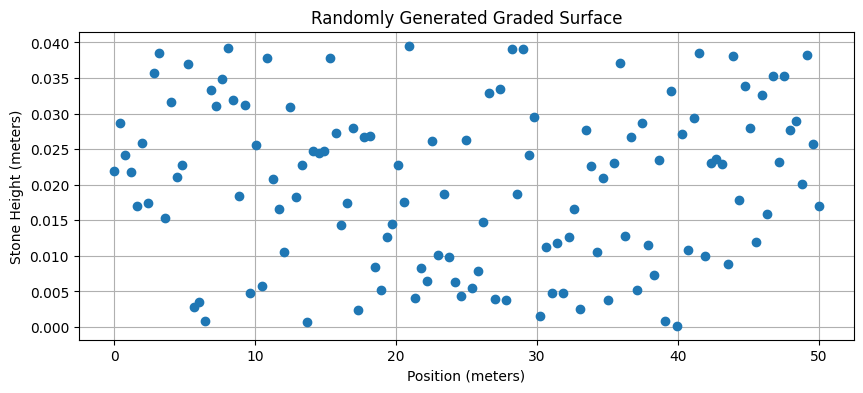

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wheel_radius = 0.2  # Wheel radius (in meters)
surface_length = 50  # Length of the surface (in meters)
stone_height = 0.04  # Height of stones (in meters)
velocity = 6.94  # Velocity of the wheel (in m/s)
gravity = 9.81  # Acceleration due to gravity (in m/s^2)

# Generate a random graded surface
np.random.seed(0)
num_stones = int(surface_length / (2 * wheel_radius))
stone_positions = np.linspace(0, surface_length, num_stones)
stone_heights = np.random.uniform(0, stone_height, num_stones)

# Calculate the required spring constant
angle_of_inclination = np.arctan(stone_heights / (2 * wheel_radius))
displacement = 2 * wheel_radius * np.sin(angle_of_inclination)
force_gravity = gravity * np.sin(angle_of_inclination)
force_inertia = velocity**2 / (2 * wheel_radius)
spring_constant = (force_gravity + force_inertia) / displacement

print("Required Spring Constant (k):", spring_constant)

# Plot the graded surface
plt.figure(figsize=(10, 4))
plt.plot(stone_positions, stone_heights, marker='o', linestyle='None')
plt.xlabel("Position (meters)")
plt.ylabel("Stone Height (meters)")
plt.title("Randomly Generated Graded Surface")
plt.grid(True)

plt.show()


<ipython-input-15-c689d56765a7>:34: RuntimeWarning: divide by zero encountered in double_scalars
  interpolation_factor = (position - stone_positions[left_index]) / (stone_positions[right_index] - stone_positions[left_index])
<ipython-input-15-c689d56765a7>:35: RuntimeWarning: invalid value encountered in double_scalars
  interpolated_height = left_height + interpolation_factor * (right_height - left_height)


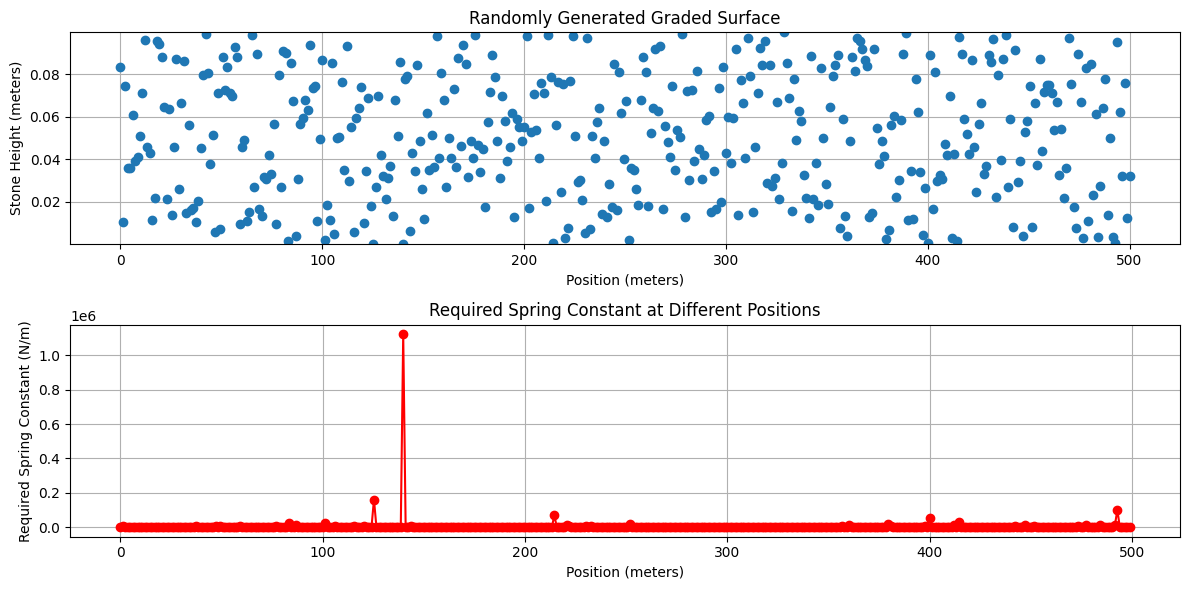

In [15]:
# @title Default title text { vertical-output: true }
import numpy as np
import matplotlib.pyplot as plt

# Constants
wheel_radius = 60/100  # Wheel radius (in meters)
surface_length = 500  # Length of the surface (in meters)
stone_height = 0.10  # Height of stones (in meters)
velocity = 7  # Velocity of the wheel (in m/s)
gravity = 9.81  # Acceleration due to gravity (in m/s^2)

# Generate a random graded surface
np.random.seed(44)
num_stones = int(surface_length / (2 * wheel_radius))
stone_positions = np.linspace(0, surface_length, num_stones)
stone_heights = np.random.uniform(0, stone_height, num_stones)

# Initialize lists to store results
contact_points = []
spring_constants = []

# Calculate contact points and spring constants for different positions
for position in stone_positions:
    # Ensure that the position is within the range of stone_positions
    position = min(max(position, 0), surface_length - 1e-6)

    # Find the nearest stone heights to the current position
    left_index = int(np.floor(position / (surface_length / num_stones)))
    right_index = min(left_index + 1, num_stones - 1)

    # Interpolate the stone heights for the current position
    left_height = stone_heights[left_index]
    right_height = stone_heights[right_index]
    interpolation_factor = (position - stone_positions[left_index]) / (stone_positions[right_index] - stone_positions[left_index])
    interpolated_height = left_height + interpolation_factor * (right_height - left_height)

    # Calculate the required spring constant at the current position
    angle_of_inclination = np.arctan(interpolated_height / (2 * wheel_radius))
    displacement = 2 * wheel_radius * np.sin(angle_of_inclination)
    force_gravity = gravity * np.sin(angle_of_inclination)
    force_inertia = velocity**2 / (2 * wheel_radius)
    spring_constant = (force_gravity + force_inertia) / displacement

    # Store the contact point and spring constant
    contact_points.append(position)
    spring_constants.append(spring_constant)

# Plot the graded surface and required spring constant
plt.figure(figsize=(12, 6))

# Plot the graded surface
plt.subplot(2, 1, 1)
# Calculate the y-axis limits for the Stone Height vs. Distance graph
stone_height_min = min(stone_heights)
stone_height_max = max(stone_heights)
plt.ylim(stone_height_min, stone_height_max)
plt.plot(stone_positions, stone_heights, marker='o', linestyle='None', label="Graded Surface")
plt.xlabel("Position (meters)")
plt.ylabel("Stone Height (meters)")
plt.title("Randomly Generated Graded Surface")
plt.grid(True)



# Set the same y-axis limits for both subplots
plt.subplot(2, 1, 2)
plt.plot(contact_points, spring_constants, marker='o', linestyle='-', color='r')
plt.xlabel("Position (meters)")
plt.ylabel("Required Spring Constant (N/m)")
plt.title("Required Spring Constant at Different Positions")
plt.grid(True)

plt.tight_layout()
plt.show()
